#Import Library

In [ ]:
# Impor pustaka yang diperlukan
import os  # Untuk interaksi dengan sistem operasi
import re  # Untuk operasi dengan ekspresi reguler
import string  # Untuk operasi dengan string
import requests  # Untuk melakukan permintaan HTTP

# Impor pustaka untuk manipulasi data
import pandas as pd  # Untuk menangani data dalam format DataFrame
import numpy as np  # Untuk operasi numerik

# Impor pustaka untuk Pemrosesan Bahasa Alami (NLP)
import nltk  # Toolkit untuk pemrosesan bahasa alami
nltk.download('punkt')  # Mengunduh tokenizer Punkt
nltk.download('stopwords')  # Mengunduh daftar stopwords
from nltk.corpus import stopwords  # Untuk menghapus stopwords

# Impor pustaka untuk visualisasi data
import matplotlib.pyplot as plt  # Untuk membuat plot
import seaborn as sns  # Untuk visualisasi lanjutan
from wordcloud import WordCloud  # Untuk membuat word cloud

# Impor pustaka untuk model pembelajaran mesin
from torch.utils.data import Dataset  # Untuk membuat dataset kustom
from transformers import (
    AutoModelForSeq2SeqLM,  # Model pra-latih untuk tugas sequence-to-sequence
    AutoTokenizer,  # Tokenizer untuk model
    Trainer,  # Untuk melatih model
    TrainingArguments  # Untuk konfigurasi pelatihan
)

# Impor tambahan untuk transformers
from transformers import BertTokenizer, AutoModel  # Untuk model dan tokenizer BERT

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Dataset dari Google Drive

In [ ]:
ay = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-ayam.csv')
ik = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-ikan.csv')
ka = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-kambing.csv')
sa = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-sapi.csv')
ta = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-tahu.csv')
tel = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-telur.csv')
tem = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-tempe.csv')
ud = pd.read_csv('/content/drive/MyDrive/Dataset SIC/dataset-udang.csv')

#Data Preprocessing

Melihat informasi dataset

In [ ]:
# Daftar dataframe yang ingin diperiksa
dataframes = [ay, ik, ka, sa, ta, tel, tem, ud]
names = ['Ayam', 'Ikan', 'Kambing', 'Sapi', 'Tahu', 'Telur', 'Tempe', 'Udang']

# Menampilkan info untuk setiap dataframe dalam satu loop
for name, df in zip(names, dataframes):
    print(f"Informasi {name}:")
    print(df.info())
    print("-" * 50)  # Pembatas antara output masing-masing dataframe

Informasi Ayam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1916 non-null   object
 1   Ingredients  1901 non-null   object
 2   Steps        1901 non-null   object
 3   Loves        1916 non-null   int64 
 4   URL          1916 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.0+ KB
None
--------------------------------------------------
Informasi Ikan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1932 non-null   object
 1   Ingredients  1932 non-null   object
 2   Steps        1932 non-null   object
 3   Loves        1932 non-null   int64 
 4   URL          1932 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.6+ KB
None
-------------------

Menggabungkan Dataset

In [ ]:
# Membuat list dari semua dataframe
df_list = [ay, ik, ka, sa, ta, tel, tem, ud]

# Menggabungkan semua dataframe menjadi satu
df_concat = pd.concat(df_list, ignore_index=True)

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15641 entries, 0 to 15640
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15641 non-null  object
 1   Ingredients  15593 non-null  object
 2   Steps        15595 non-null  object
 3   Loves        15641 non-null  int64 
 4   URL          15641 non-null  object
dtypes: int64(1), object(4)
memory usage: 611.1+ KB


In [ ]:
df_concat.head()

,Title,Ingredients,Steps,Loves,URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam


In [ ]:
df = df_concat.copy()

In [ ]:
df.isna().sum()

,0
Title,0
Ingredients,48
Steps,46
Loves,0
URL,0


In [ ]:
df.duplicated().sum()

642

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14951 entries, 0 to 15640
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        14951 non-null  object
 1   Ingredients  14951 non-null  object
 2   Steps        14951 non-null  object
 3   Loves        14951 non-null  int64 
 4   URL          14951 non-null  object
dtypes: int64(1), object(4)
memory usage: 700.8+ KB


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        14951 non-null  object
 1   Ingredients  14951 non-null  object
 2   Steps        14951 non-null  object
 3   Loves        14951 non-null  int64 
 4   URL          14951 non-null  object
dtypes: int64(1), object(4)
memory usage: 584.1+ KB


Melakukan pembersihan pada data menggunakan Library NLTK (Natural Language Toolkit).
Menghapus Stopwords (Stopwords adalah kata-kata umum yang sering muncul dan tidak memberikan informasi penting yang biasanya tidak diacuhkan atau dibuang dalam pemrosesan teks)

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    """Membersihkan teks dari noise yang tidak relevan dalam konteks resep."""

    # Pastikan text adalah string, jika bukan, ganti dengan string kosong
    if not isinstance(text, str):
        text = str(text)  # Mengubah tipe data menjadi string jika perlu

    # Ubah ke huruf kecil
    text = text.lower()

    # Hapus URL dan tanda @
    text = re.sub(r'http\S+|www\S+', '', text)  # Hapus URL
    text = re.sub(r'@\S+', '', text)  # Hapus @

    # Hapus angka dan satuan kecuali untuk angka penting dalam resep
    text = re.sub(r'\d+\s*(sdt|sendok|gelas|batang|buah|lembar|ruas|sdt|kg|gr|cm|ml|liter)', '', text)  # Hapus angka yang terkait satuan

    # Hapus tanda baca yang tidak diperlukan, tetapi biarkan koma dan titik untuk struktur resep
    text = re.sub(r'[^\w\s,.\-]', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # Hapus stopwords kecuali kata-kata penting dalam konteks resep
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Hapus emoji atau karakter non-alfabet (misalnya emotikon atau karakter khusus)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text
# Bersihkan kolom ingredients dan steps
df['clean_ingredients'] = df['Ingredients'].apply(clean_text)
df['clean_steps'] = df['Steps'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,Title,Ingredients,Steps,Loves,URL,clean_ingredients,clean_steps
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,1 ekor ayam kampung potong 12-- jeruk nipis--2...,cuci bersih ayam tiriskan. peras jeruk nipis k...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam dipotong sesuai selera kecil2 ya-- serai ...,"haluskan bumbu2nya baput, ketumbar, kemiri, ku..."
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,1 ayam-- cabai hijau besar-- cabai merah rawit...,panaskan minyak wajan. minyak panas masukkan a...
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,daging ayam pakai fillet--secukupnya gula gara...,goreng ayam ayam krispi--ulek bahan sambal cam...
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,kulit ayam lemaknya--8 siung bawang putih kati...,cuci bersih kulit ayam. sisihkan--ambil minyak...


In [ ]:
pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=af62ed3de7a9c11a7a12a3485ca2db30e876e0698a79b986e7a08df619da04ef
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


Akses Kamus: https://github.com/romanouke/satria_data/blob/main/kumpulan_kata.txt

In [ ]:
# Fungsi untuk memuat kamus dari URL
def load_kamus_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        kamus = set(response.text.splitlines())
        return kamus
    else:
        print("Gagal memuat kamus. Status code:", response.status_code)
        return None

# URL kamus
url = 'https://raw.githubusercontent.com/romanouke/satria_data/refs/heads/main/kumpulan_kata.txt?token=GHSAT0AAAAAAC3EXVUDQYFL3MP7RGB43GUWZ27WLAA'

# Memuat kamus dari URL
kamus = load_kamus_from_url(url)

if kamus:
    print("Kamus berhasil dimuat dengan", len(kamus), "kata.")
else:
    print("Gagal memuat kamus.")

Kamus berhasil dimuat dengan 112933 kata.


In [ ]:
import langid

def clean_non_indonesian_english_words(clean_text, kamus):
    words = clean_text.split()
    cleaned_words = []
    for word in words:
        lang, _ = langid.classify(word)
        if lang == 'id' or lang == 'en':  # Hanya menyertakan kata-kata dalam bahasa Indonesia atau Inggris
            if word.lower() in kamus:
                cleaned_words.append(word)
        else:  # Menyertakan kata-kata dalam bahasa lain
            cleaned_words.append(word)
    return ' '.join(cleaned_words)

# Terapkan fungsi pembersihan ke kolom
df['clean_ingredients_2'] = df['clean_ingredients'].apply(lambda x: clean_non_indonesian_english_words(x, kamus))
df['clean_steps_2'] = df['clean_steps'].apply(lambda x: clean_non_indonesian_english_words(x, kamus))

In [ ]:
# Mendownload dataframe df ke file CSV
file_path = '/content/drive/MyDrive/Dataset SIC/df1.csv'  # Nama file yang akan disimpan
df.to_csv(file_path, index=False)  # index=False untuk tidak menyimpan indeks

print(f"File berhasil disimpan sebagai {file_path}")

File berhasil disimpan sebagai /content/drive/MyDrive/Dataset SIC/df1.csv


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset SIC/df1.csv')

In [ ]:
df1.head(2)

,Title,Ingredients,Steps,Loves,URL,clean_ingredients,clean_steps,clean_ingredients_2,clean_steps_2
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,1 ekor ayam kampung potong 12-- jeruk nipis--2...,cuci bersih ayam tiriskan. peras jeruk nipis k...,ekor ayam kampung potong jeruk sdm bawang bawa...,cuci bersih ayam tiriskan. peras jeruk nipis k...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam dipotong sesuai selera kecil2 ya-- serai ...,"haluskan bumbu2nya baput, ketumbar, kemiri, ku...",ayam sesuai selera serai daun jeruk--7 butir b...,"laos, garam sisihkan--campur bumbu halus ayam ..."


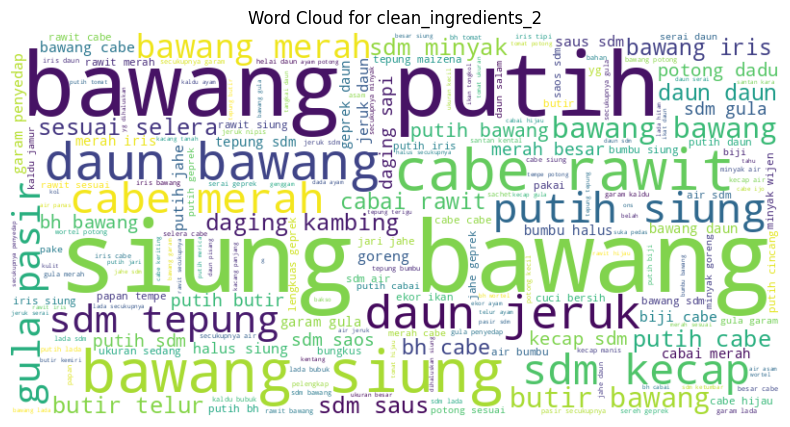

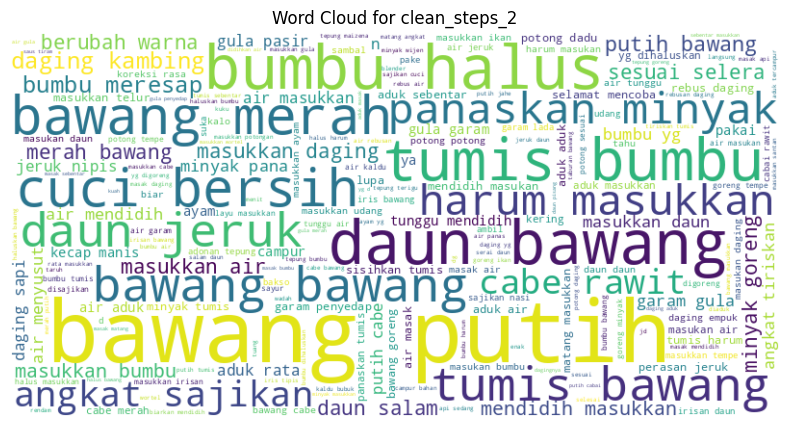

In [ ]:
# Fungsi untuk membuat dan menampilkan word cloud
def create_wordcloud(text, label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()

# Gabungkan teks di setiap kolom
for column in ['clean_ingredients_2', 'clean_steps_2']:
    combined_text = ' '.join(df1[column].dropna().astype(str))  # Gabungkan teks, abaikan NaN
    create_wordcloud(combined_text, column)

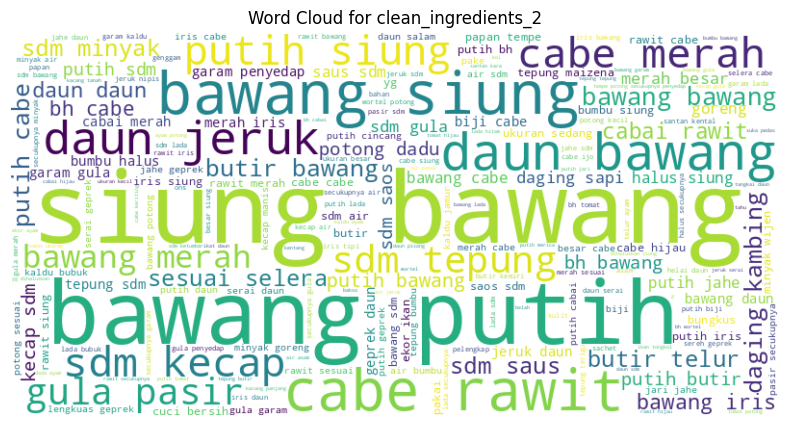

<ipython-input-31-d2387950fc3c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


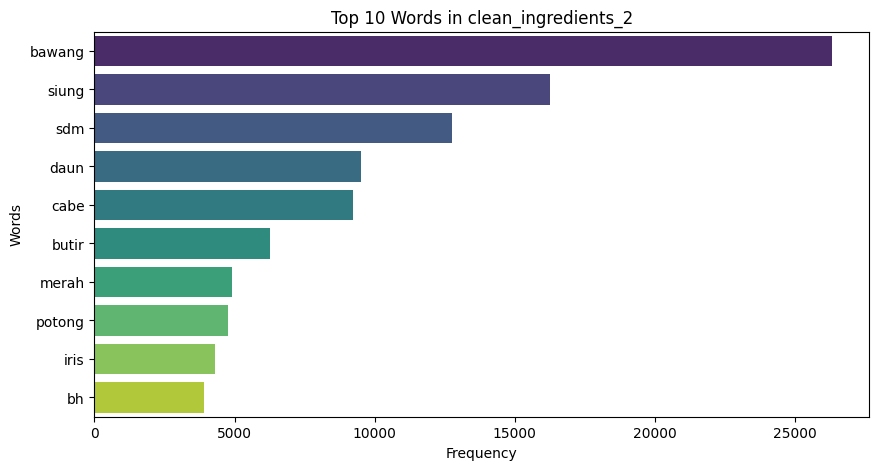

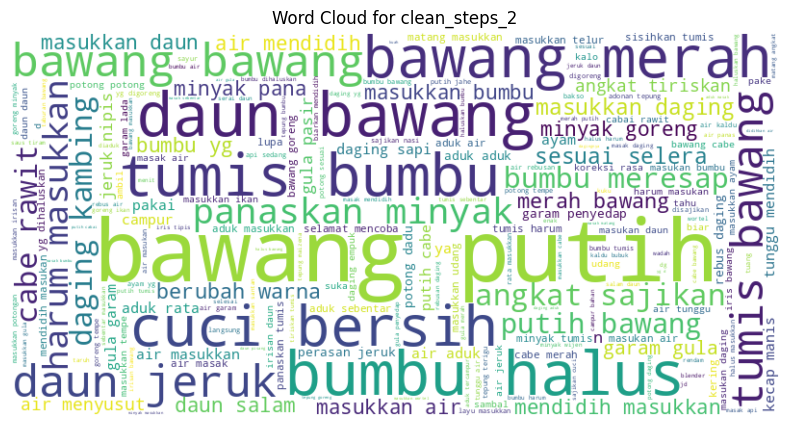

<ipython-input-31-d2387950fc3c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


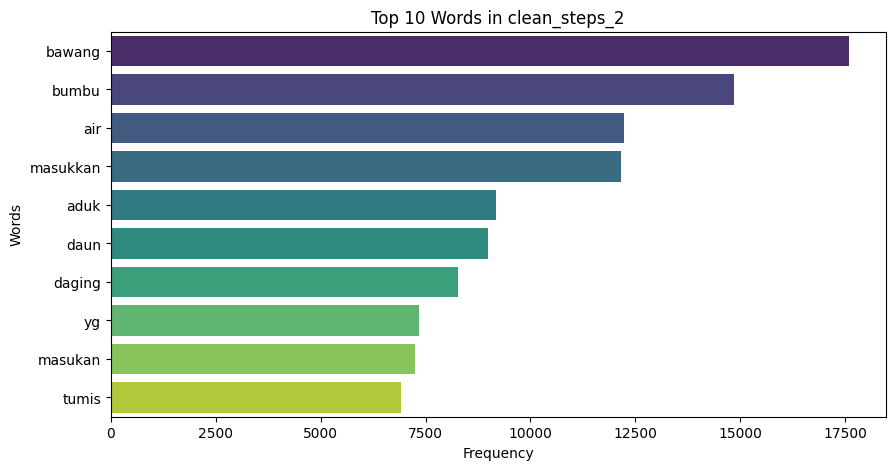

In [ ]:

# Fungsi untuk menghitung dan menampilkan top 10 kata
def show_top_words(text, label, top_n=10):
    words = text.split()  # Pisahkan teks menjadi kata-kata
    word_freq = Counter(words)  # Hitung frekuensi kemunculan kata
    top_words = pd.DataFrame(word_freq.most_common(top_n), columns=['Word', 'Frequency'])  # Ambil top N

    # Visualisasi menggunakan seaborn
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
    plt.title(f'Top {top_n} Words in {label}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Gabungkan teks di setiap kolom dan tampilkan word cloud serta top words
for column in ['clean_ingredients_2', 'clean_steps_2']:
    combined_text = ' '.join(df1[column].dropna().astype(str))  # Gabungkan teks, abaikan NaN
    create_wordcloud(combined_text, column)  # Tampilkan word cloud
    show_top_words(combined_text, column)   # Tampilkan top 10 kata

In [ ]:

# Pastikan kolom tidak memiliki nilai NaN dan konversi ke string
df1['clean_ingredients_2'] = df1['clean_ingredients_2'].fillna('').astype(str)

# Membuat Counter untuk masing-masing panjang kata
word_counts_len_1 = Counter()
word_counts_len_2 = Counter()
word_counts_len_3 = Counter()

# Iterasi teks di kolom 'clean_ingredients_2'
for text in df1['clean_ingredients_2'].str.split():
    word_counts_len_1.update([word for word in text if len(word) == 1])
    word_counts_len_2.update([word for word in text if len(word) == 2])
    word_counts_len_3.update([word for word in text if len(word) == 3])

# Mendapatkan top 10 kata teratas untuk masing-masing panjang kata
top_10_len_1 = word_counts_len_1.most_common(50)
top_10_len_2 = word_counts_len_2.most_common(10)
top_10_len_3 = word_counts_len_3.most_common(10)

# Menampilkan hasil
print("Top 10 words with length 1:")
print(top_10_len_1)

print("\nTop 10 words with length 2:")
print(top_10_len_2)

print("\nTop 10 words with length 3:")
print(top_10_len_3)

Top 10 words with length 1:
[('g', 314), ('n', 175), ('d', 141), ('m', 74), ('u', 62), ('l', 60), ('q', 26), ('a', 24), ('b', 19), ('y', 16), ('i', 14), ('x', 14), ('c', 5), ('t', 5), ('p', 3), ('k', 3), ('z', 2), ('o', 2), ('h', 1)]

Top 10 words with length 2:
[('bh', 3923), ('yg', 1293), ('am', 980), ('uk', 367), ('me', 229), ('ga', 205), ('dg', 125), ('cc', 122), ('jd', 110), ('es', 101)]

Top 10 words with length 3:
[('sdm', 12750), ('air', 2155), ('teh', 626), ('ons', 615), ('iga', 254), ('kol', 239), ('mie', 215), ('ijo', 187), ('cup', 176), ('gak', 143)]


In [ ]:

# Pastikan kolom tidak memiliki nilai NaN dan konversi ke string
df1['clean_steps_2'] = df1['clean_steps_2'].fillna('').astype(str)

# Membuat Counter untuk masing-masing panjang kata
word_counts_len_1 = Counter()
word_counts_len_2 = Counter()
word_counts_len_3 = Counter()

# Iterasi teks di kolom 'clean_steps_2'
for text in df1['clean_steps_2'].str.split():
    word_counts_len_1.update([word for word in text if len(word) == 1])
    word_counts_len_2.update([word for word in text if len(word) == 2])
    word_counts_len_3.update([word for word in text if len(word) == 3])

# Mendapatkan top 10 kata teratas untuk masing-masing panjang kata
top_10_len_1 = word_counts_len_1.most_common(10)
top_10_len_2 = word_counts_len_2.most_common(10)
top_10_len_3 = word_counts_len_3.most_common(10)

# Menampilkan hasil
print("Top 10 words with length 1:")
print(top_10_len_1)

print("\nTop 10 words with length 2:")
print(top_10_len_2)

print("\nTop 10 words with length 3:")
print(top_10_len_3)

Top 10 words with length 1:
[('d', 1049), ('n', 994), ('k', 130), ('g', 115), ('y', 91), ('a', 50), ('u', 28), ('b', 24), ('x', 18), ('c', 16)]

Top 10 words with length 2:
[('yg', 7335), ('dg', 1478), ('ya', 993), ('ga', 450), ('jd', 309), ('es', 226), ('tp', 207), ('kl', 103), ('gk', 92), ('si', 90)]

Top 10 words with length 3:
[('air', 12228), ('api', 2891), ('tes', 1306), ('pas', 809), ('sdm', 711), ('cek', 569), ('isi', 476), ('iga', 462), ('smp', 460), ('bau', 429)]


In [ ]:
# Menghapus kata dengan panjang 1 dari kolom 'clean_ingredients_2'
df1['clean_ingredients_2'] = df1['clean_ingredients_2'].apply(
    lambda x: ' '.join(word for word in x.split() if len(word) > 1)
)
df1['clean_steps_2'] = df1['clean_steps_2'].apply(
    lambda x: ' '.join(word for word in x.split() if len(word) > 1)
)

In [ ]:

# Fungsi untuk mengganti frasa menjadi format satu kata
def replace_phrases(df1, column, replacements):
    # Pastikan semua nilai adalah string
    df1[column] = df1[column].fillna("").astype(str)

    # Ganti frasa sesuai dengan mapping pada dictionary `replacements`
    for old_phrase, new_phrase in replacements.items():
        df1[column] = df1[column].str.replace(fr'\b{old_phrase}\b', new_phrase, regex=True)
    return df1

# Daftar frasa yang ingin diganti
replacements = {
    "bawang putih": "bawang-putih",
    "bawang merah": "bawang-merah",
    "bawang bombay": "bawang-bombay"
}

df1 = replace_phrases(df1, "clean_ingredients_2", replacements)

In [ ]:
df1 = replace_phrases(df1, "clean_steps_2", replacements)

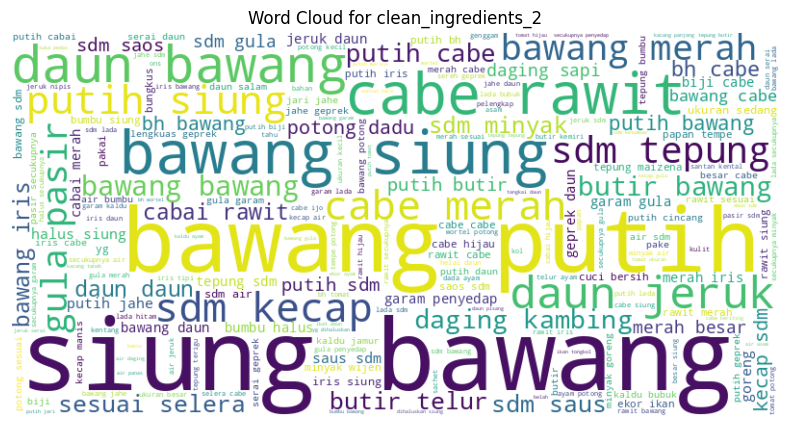

<ipython-input-38-d2387950fc3c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


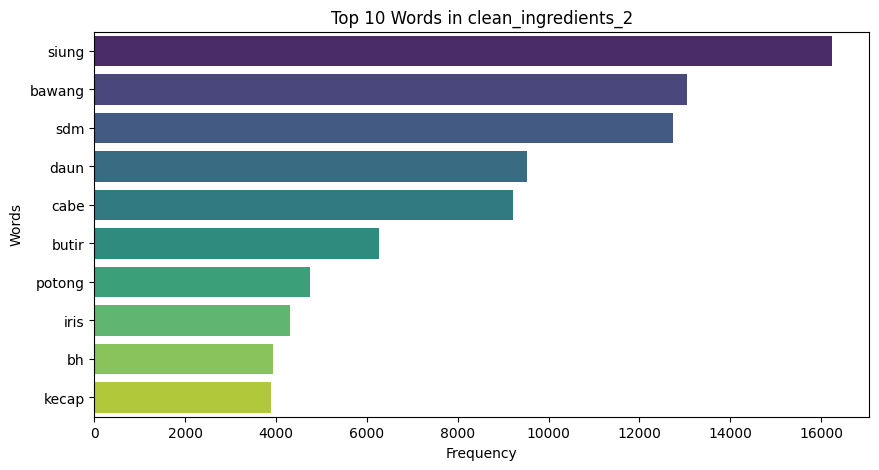

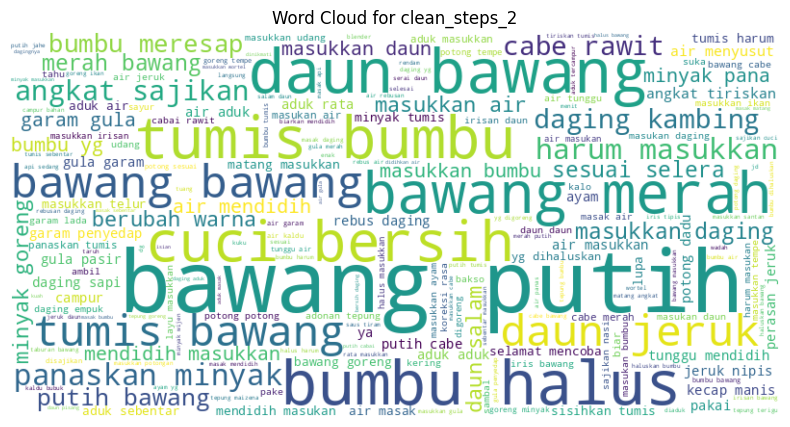

<ipython-input-38-d2387950fc3c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


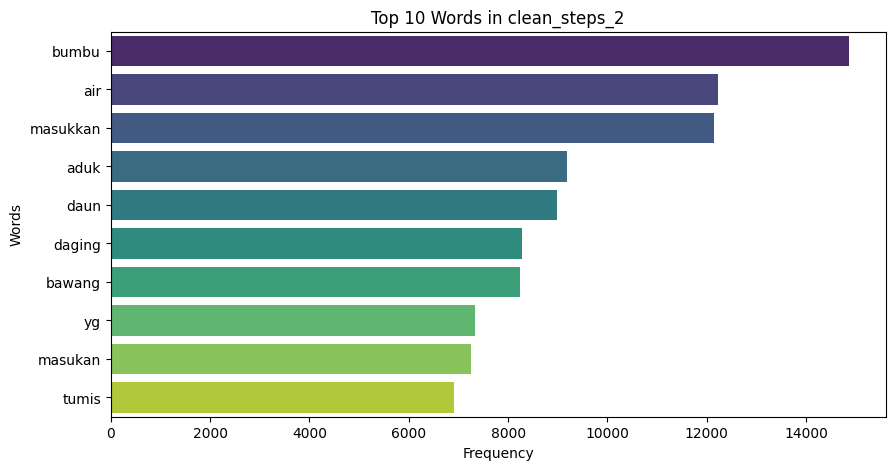

In [ ]:

# Fungsi untuk menghitung dan menampilkan top 10 kata
def show_top_words(text, label, top_n=10):
    words = text.split()  # Pisahkan teks menjadi kata-kata
    word_freq = Counter(words)  # Hitung frekuensi kemunculan kata
    top_words = pd.DataFrame(word_freq.most_common(top_n), columns=['Word', 'Frequency'])  # Ambil top N

    # Visualisasi menggunakan seaborn
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
    plt.title(f'Top {top_n} Words in {label}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Gabungkan teks di setiap kolom dan tampilkan word cloud serta top words
for column in ['clean_ingredients_2', 'clean_steps_2']:
    combined_text = ' '.join(df1[column].dropna().astype(str))  # Gabungkan teks, abaikan NaN
    create_wordcloud(combined_text, column)  # Tampilkan word cloud
    show_top_words(combined_text, column)   # Tampilkan top 10 kata

In [ ]:
df1.head(2)

,Title,Ingredients,Steps,Loves,URL,clean_ingredients,clean_steps,clean_ingredients_2,clean_steps_2
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,1 ekor ayam kampung potong 12-- jeruk nipis--2...,cuci bersih ayam tiriskan. peras jeruk nipis k...,ekor ayam kampung potong jeruk sdm bawang bawa...,cuci bersih ayam tiriskan. peras jeruk nipis k...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam dipotong sesuai selera kecil2 ya-- serai ...,"haluskan bumbu2nya baput, ketumbar, kemiri, ku...",ayam sesuai selera serai daun jeruk--7 butir b...,"laos, garam sisihkan--campur bumbu halus ayam ..."


In [ ]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk membersihkan dan melakukan stemming pada teks
def clean_and_stem(doc):
    # Tokenisasi menggunakan split (memisahkan teks berdasarkan spasi)
    tokens = doc.split()

    # Stemming menggunakan Sastrawi
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Menggabungkan kembali token menjadi kalimat
    stemmed_sentence = ' '.join(stemmed_tokens)

    # Mengubah teks menjadi lowercase
    stemmed_sentence = stemmed_sentence.lower().strip()

    # Menghilangkan karakter khusus dan angka
    stemmed_sentence = stemmed_sentence.translate(str.maketrans('', '', string.punctuation))
    stemmed_sentence = ''.join([char for char in stemmed_sentence if not char.isdigit()])

    return stemmed_sentence

# Membersihkan dan melakukan stemming pada kolom 'clean_steps_2'
df1['clean_steps_3'] = df1['clean_steps_2'].apply(clean_and_stem)

# Menampilkan hasil
print(df1)


                                   Title  \
0                       Ayam Woku Manado   
1               Ayam goreng tulang lunak   
2                       Ayam cabai kawin   
3                            Ayam Geprek   
4                            Minyak Ayam   
...                                  ...   
14946                 Udang saus mentega   
14947                 Jipang tumis udang   
14948                  Tumis Udang Tempe   
14949  Tumis kacang panjang terong udang   
14950                  Siomay Udang Ayam   

                                             Ingredients  \
0      1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...   
1      1 kg ayam (dipotong sesuai selera jangan kecil...   
2      1/4 kg ayam--3 buah cabai hijau besar--7 buah ...   
3      250 gr daging ayam (saya pakai fillet)--Secuku...   
4      400 gr kulit ayam & lemaknya--8 siung bawang p...   
...                                                  ...   
14946  1 kg udang segar--1 buah bawang bombay kecil

In [ ]:
# Mendownload dataframe df ke file CSV
file_path = '/content/drive/MyDrive/Dataset SIC/df2_new.csv'  # Nama file yang akan disimpan
df1.to_csv(file_path, index=False)  # index=False untuk tidak menyimpan indeks

print(f"File berhasil disimpan sebagai {file_path}")

File berhasil disimpan sebagai /content/drive/MyDrive/Dataset SIC/df2_new.csv


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset SIC/df2_new.csv')

In [ ]:
df2.head(2)

,Title,Ingredients,Steps,Loves,URL,clean_ingredients,clean_steps,clean_ingredients_2,clean_steps_2,clean_steps_3
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,1 ekor ayam kampung potong 12-- jeruk nipis--2...,cuci bersih ayam tiriskan. peras jeruk nipis k...,ekor ayam kampung potong jeruk sdm bawang bawa...,cuci bersih ayam tiriskan. peras jeruk nipis k...,cuci bersih ayam tiris peras jeruk nipis kalo ...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam dipotong sesuai selera kecil2 ya-- serai ...,"haluskan bumbu2nya baput, ketumbar, kemiri, ku...",ayam sesuai selera serai daun jeruk--7 butir b...,"laos, garam sisihkan--campur bumbu halus ayam ...",laos garam sisihkancampur bumbu halus ayam yg ...


In [ ]:
df2 = df2.drop(['Title', 'Loves','URL'], axis=1)

In [ ]:
df2.head(2)

,Ingredients,Steps,clean_ingredients,clean_steps,clean_ingredients_2,clean_steps_2,clean_steps_3
0,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1 ekor ayam kampung potong 12-- jeruk nipis--2...,cuci bersih ayam tiriskan. peras jeruk nipis k...,ekor ayam kampung potong jeruk sdm bawang bawa...,cuci bersih ayam tiriskan. peras jeruk nipis k...,cuci bersih ayam tiris peras jeruk nipis kalo ...
1,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",ayam dipotong sesuai selera kecil2 ya-- serai ...,"haluskan bumbu2nya baput, ketumbar, kemiri, ku...",ayam sesuai selera serai daun jeruk--7 butir b...,"laos, garam sisihkan--campur bumbu halus ayam ...",laos garam sisihkancampur bumbu halus ayam yg ...


In [ ]:
df2.isna().sum()

,0
Ingredients,0
Steps,0
clean_ingredients,0
clean_steps,0
clean_ingredients_2,6
clean_steps_2,0
clean_steps_3,0


In [ ]:
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)

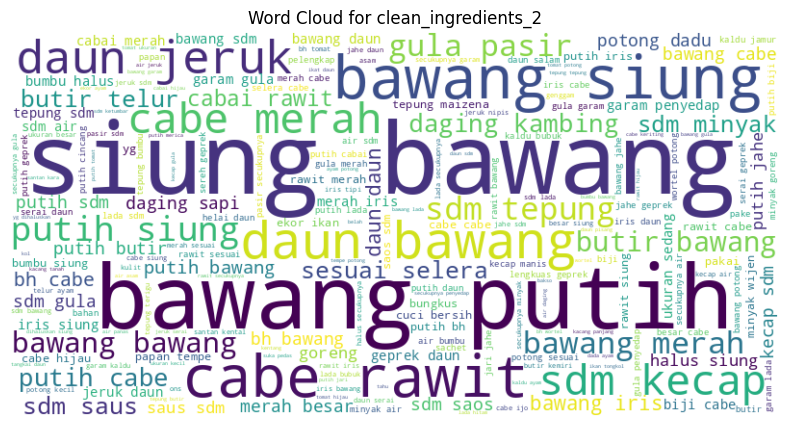

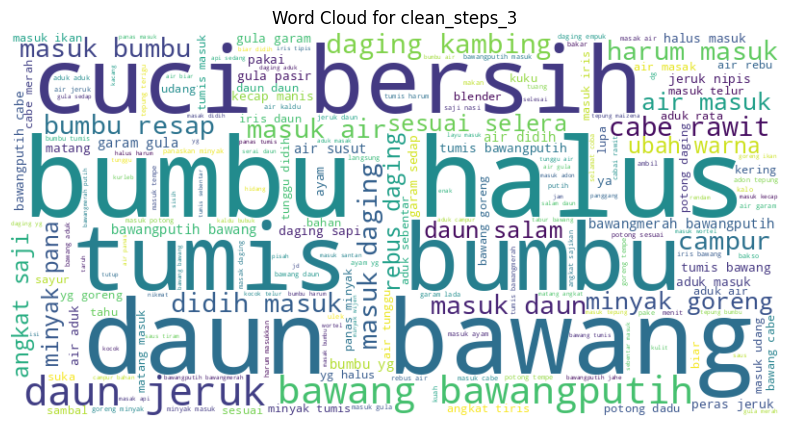

In [ ]:

# Fungsi untuk membuat dan menampilkan word cloud
def create_wordcloud(text, label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()

# Gabungkan teks di setiap kolom
for column in ['clean_ingredients_2', 'clean_steps_3']:
    combined_text = ' '.join(df2[column].dropna().astype(str))  # Gabungkan teks, abaikan NaN
    create_wordcloud(combined_text, column)

#Modelling

Menginstal pustaka Hugging Face Hub dan melakukan autentikasi ke akun Hugging Face. Dengan memanggil fungsi login(), Anda dapat memasukkan token autentikasi untuk mengakses fitur seperti mengunggah atau mengunduh model, dataset, serta mengelola repositori pribadi di platform Hugging Face.
Hugging Face Hub adalah platform kolaboratif yang menyediakan akses ke berbagai model machine learning, dataset, dan alat pengembangan AI. Pengguna dapat mengunggah, berbagi, dan mengunduh model seperti transformer, serta menggunakan API untuk integrasi dengan proyek mereka. Platform ini mendukung komunitas AI global dengan menyediakan repositori terbuka dan pribadi, dokumentasi, serta fitur seperti model inference langsung di cloud.

Untuk login masukkan token ini:
##############################

In [ ]:
!pip install huggingface_hub
from huggingface_hub import login

login()  # Ini akan meminta Anda untuk memasukkan token autentikasi

Untuk melatih model sequence-to-sequence (seq2seq) berbasis transformer dengan dataset resep makanan. Pustaka seperti transformers dan torch digunakan untuk memproses data dan model. Pertama, variabel lingkungan WANDB_DISABLED dinonaktifkan untuk menghindari pelacakan eksperimen dengan Weight & Biases. Tokenizer dari model IndoBERT digunakan untuk memproses teks input, dan dataset kustom RecipeDataset diformat agar menghasilkan input IDs dan labels yang sesuai untuk pelatihan. Model T5-small dimuat untuk tugas seq2seq, dan argumen pelatihan diatur untuk pengujian cepat, dengan ukuran batch kecil, satu epoch, dan tanpa evaluasi atau penyimpanan checkpoint. Terakhir, kelas Trainer digunakan untuk menggabungkan model, dataset, tokenizer, dan parameter pelatihan, memfasilitasi alur pelatihan dengan konfigurasi minimal untuk percobaan cepat.

In [ ]:

# Nonaktifkan W&B
os.environ["WANDB_DISABLED"] = "true"

# Load tokenizer

tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")


# Tokenisasi bahan dan langkah
df2['tokenized_ingredients'] = df2['clean_ingredients_2'].apply(lambda x: tokenizer.tokenize(x))
df2['tokenized_steps'] = df2['clean_steps_3'].apply(lambda x: tokenizer.tokenize(x))
def clean_tokens(tokens):
    # Filter token yang mengandung karakter alfanumerik saja dan menghapus yang tidak relevan
    cleaned_tokens = [token for token in tokens if re.match(r'^[a-zA-Z]+$', token)]
    return cleaned_tokens
# Pembersihan token setelah tokenisasi untuk menghapus token yang tidak diinginkan
df2['cleaned_tokenized_ingredients'] = df2['tokenized_ingredients'].apply(clean_tokens)
df2['cleaned_tokenized_steps'] = df2['tokenized_steps'].apply(clean_tokens)

# Dataset Sederhana
class RecipeDataset(Dataset):
    def __init__(self, ingredients, steps, tokenizer, max_length=64):
        self.ingredients = ingredients[:500]  # Hanya gunakan 500 sampel untuk uji cepat
        self.steps = steps[:500]
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.ingredients)

    def __getitem__(self, idx):
        # Format input sebagai "Bahan: {bahan} [SEP] Langkah: {langkah}"
        input_text = "Bahan: " + self.ingredients[idx] + " [SEP] Langkah:"
        target_text = self.steps[idx]

        # Tokenisasi input
        input_encoding = self.tokenizer(
            input_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        # Tokenisasi output
        target_encoding = self.tokenizer(
            target_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': input_encoding['input_ids'].squeeze(0),
            'attention_mask': input_encoding['attention_mask'].squeeze(0),
            'labels': target_encoding['input_ids'].squeeze(0)
        }

# Persiapkan dataset
train_dataset = RecipeDataset(
    ingredients=df2['cleaned_tokenized_ingredients'].apply(lambda x: ' '.join(x)).tolist(),
    steps=df2['cleaned_tokenized_steps'].apply(lambda x: ' '.join(x)).tolist(),
    tokenizer=tokenizer
)

# Load Model
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')

# Argumen pelatihan yang dioptimalkan untuk kecepatan
training_args = TrainingArguments(
    output_dir='./test_output',  # Direktori untuk output model
    evaluation_strategy="no",  # Nonaktifkan evaluasi selama pelatihan
    learning_rate=3e-5,  # Pembelajaran dengan learning rate yang lebih kecil
    per_device_train_batch_size=2,  # Ukuran batch lebih kecil untuk menghemat memori
    per_device_eval_batch_size=2,  # Ukuran batch evaluasi
    num_train_epochs=100,  # Hanya 1 epoch untuk pengujian cepat
    weight_decay=0.01,  # Regularisasi untuk mencegah overfitting
    logging_dir='./test_logs',  # Direktori untuk log pelatihan
    logging_steps=200,  # Menyimpan log setiap 200 langkah
    save_strategy="no",  # Jangan menyimpan checkpoint model selama pelatihan
    save_steps=1000,  # Simpan model setiap 1000 langkah (dapat diubah)
    report_to="none",  # Tidak melaporkan hasil ke layanan seperti W&B atau TensorBoard
    disable_tqdm=False,  # Tampilkan progress bar selama pelatihan
    load_best_model_at_end=False  # Tidak perlu memuat model terbaik di akhir pelatihan
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Dataset pelatihan yang sudah disiapkan
    eval_dataset=None,  # Tidak ada dataset evaluasi
    tokenizer=tokenizer,  # Gunakan tokenizer yang sesuai
    # model_init=init_model, # jika menggunakan model yang berbeda pada setiap train
    data_collator=None,  # Gunakan default data collator (biasa digunakan untuk seq2seq)
)

In [ ]:
df2.head()

,Ingredients,Steps,clean_ingredients,clean_steps,clean_ingredients_2,clean_steps_2,clean_steps_3,tokenized_ingredients,tokenized_steps,cleaned_tokenized_ingredients,cleaned_tokenized_steps
0,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1 ekor ayam kampung potong 12-- jeruk nipis--2...,cuci bersih ayam tiriskan. peras jeruk nipis k...,ekor ayam kampung potong jeruk sdm bawang bawa...,cuci bersih ayam tiriskan. peras jeruk nipis k...,cuci bersih ayam tiris peras jeruk nipis kalo ...,"[ekor, ayam, kampung, potong, jeruk, sdm, bawa...","[cuci, bersih, ayam, tiri, ##s, per, ##as, jer...","[ekor, ayam, kampung, potong, jeruk, sdm, bawa...","[cuci, bersih, ayam, tiri, per, jeruk, nip, ka..."
1,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",ayam dipotong sesuai selera kecil2 ya-- serai ...,"haluskan bumbu2nya baput, ketumbar, kemiri, ku...",ayam sesuai selera serai daun jeruk--7 butir b...,"laos, garam sisihkan--campur bumbu halus ayam ...",laos garam sisihkancampur bumbu halus ayam yg ...,"[ayam, sesuai, selera, ser, ##ai, daun, jeruk,...","[laos, garam, sisi, ##h, ##kan, ##ca, ##mpu, #...","[ayam, sesuai, selera, ser, daun, jeruk, butir...","[laos, garam, sisi, bumbu, halus, ayam, yg, be..."
2,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,1 ayam-- cabai hijau besar-- cabai merah rawit...,panaskan minyak wajan. minyak panas masukkan a...,cabai hijau besar-- cabai merah rawit--3 siung...,panaskan minyak minyak panas masukkan ayam dad...,panas minyak minyak panas masuk ayam dadu gore...,"[cabai, hijau, besar, -, -, cabai, merah, raw,...","[panas, minyak, minyak, panas, masuk, ayam, da...","[cabai, hijau, besar, cabai, merah, raw, si, b...","[panas, minyak, minyak, panas, masuk, ayam, da..."
3,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,daging ayam pakai fillet--secukupnya gula gara...,goreng ayam ayam krispi--ulek bahan sambal cam...,daging ayam pakai gula tepung ayam lalapan kem...,goreng ayam ayam bahan sambal campur minyak pa...,goreng ayam ayam bahan sambal campur minyak pa...,"[daging, ayam, pakai, gula, tepung, ayam, lala...","[goreng, ayam, ayam, bahan, sambal, campur, mi...","[daging, ayam, pakai, gula, tepung, ayam, lala...","[goreng, ayam, ayam, bahan, sambal, campur, mi..."
4,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,kulit ayam lemaknya--8 siung bawang putih kati...,cuci bersih kulit ayam. sisihkan--ambil minyak...,"kulit ayam siung bawang-putih cincang jahe, ge...",cuci bersih kulit minyak goreng bahan yg tumis...,cuci bersih kulit minyak goreng bahan yg tumis...,"[kulit, ayam, si, ##ung, bawang, -, putih, cin...","[cuci, bersih, kulit, minyak, goreng, bahan, y...","[kulit, ayam, si, bawang, putih, cinc, jahe, g...","[cuci, bersih, kulit, minyak, goreng, bahan, y..."


Memulai proses training data dan menyimpan di Google Drive

EPOCH 100

In [ ]:
# Mulai pelatihan
trainer.train()

# Setelah pelatihan selesai, simpan model dan tokenizer
model.save_pretrained('/content/drive/MyDrive/Dataset SIC/model_indobart_new6')  # Menyimpan model ke Google Drive
tokenizer.save_pretrained('/content/drive/MyDrive/Dataset SIC/model_indobart_new6')  # Menyimpan tokenizer ke Google Drive

Step,Training Loss
500,7.259400
1000,0.000000
1500,0.000000
2000,0.000000
2500,0.000000
3000,0.000000
3500,0.000000
4000,0.000000
4500,0.000000
5000,0.000000


('/content/drive/MyDrive/Dataset SIC/model_indobart_new6/tokenizer_config.json',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new6/special_tokens_map.json',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new6/vocab.txt',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new6/added_tokens.json',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new6/tokenizer.json')

EPOCH 50

In [ ]:
# Mulai pelatihan
trainer.train()

# Setelah pelatihan selesai, simpan model dan tokenizer
model.save_pretrained('/content/drive/MyDrive/Dataset SIC/model_indobart_new5')  # Menyimpan model ke Google Drive
tokenizer.save_pretrained('/content/drive/MyDrive/Dataset SIC/model_indobart_new5')  # Menyimpan tokenizer ke Google Drive

Step,Training Loss
200,6.113400
400,4.778900
600,4.348400
800,4.360500
1000,4.119900
1200,4.062500
1400,3.952300
1600,3.972000
1800,3.878900
2000,3.763500


('/content/drive/MyDrive/Dataset SIC/model_indobart_new5/tokenizer_config.json',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new5/special_tokens_map.json',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new5/vocab.txt',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new5/added_tokens.json',
 '/content/drive/MyDrive/Dataset SIC/model_indobart_new5/tokenizer.json')

#Testing

In [ ]:
# Load model dan tokenizer dari Google Drive
model_path = '/content/drive/MyDrive/Dataset SIC/model_indobart_new5'  # Folder tempat model dan tokenizer disimpan
tokenizer_path = '/content/drive/MyDrive/Dataset SIC/model_indobart_new5'  # Path yang sama

model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

In [ ]:

def generate_recipe(input_ingredients, model, tokenizer, max_length=150, min_length=50):
    # Gabungkan bahan-bahan menjadi satu string dengan format yang lebih informatif
    input_text = "Gunakan bahan berikut untuk membuat resep: " + ", ".join(input_ingredients) + "."

    # Tokenisasi input
    inputs = tokenizer(
        input_text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=max_length
    )

    # Model menghasilkan output
    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=150,
        min_length=50,
        num_beams=12,
        num_return_sequences=5,
        early_stopping=True,
        do_sample=True,
        top_k=50,
        top_p=0.9,
        temperature=0.7,  # Reduced temperature for more conservative sampling
        repetition_penalty=1.2,  # Lowered repetition penalty
        length_penalty=1.2
    )

    # Dekode output ke teks
    predicted_steps = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return predicted_steps

EPOCH 50

In [ ]:
# Contoh input bahan
input_ingredients = ["nasi", "ayam", "minyak", "garam", "tepung"]

# Memanggil fungsi generate_recipe
predicted_steps = generate_recipe(input_ingredients, model, tokenizer)
print("Langkah-langkah resep yang dihasilkan:")
print(predicted_steps)

Langkah-langkah resep yang dihasilkan:
cuci bersih ayam ren campur tepung terigu goreng ayam minyak panas goreng ayam minyak panas goreng ayam minyak panas api sedang minyak panas goreng ayam minyak panas api sedang minyak panas goreng ayam minyak panas api sedang minyak panas api masuk ayam goreng api


In [ ]:
# Contoh input bahan
input_ingredients = ["tempe", "minyak", "garam"]

# Memanggil fungsi generate_recipe
predicted_steps = generate_recipe(input_ingredients, model, tokenizer)
print("Langkah-langkah resep yang dihasilkan:")
print(predicted_steps)

Langkah-langkah resep yang dihasilkan:
cuci bersih rebus air didi masuk ayam yg panas minyak goreng saji
